This test using lstm seems to just be a copy and paste of multiple places since it doesn't work and the charts are from other article working on characters
https://thecleverprogrammer.com/2020/07/20/next-word-prediction-model/

In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense,Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [2]:
path = 'data/1661-0.txt'
text = open(path, encoding = 'utf-8').read().lower()
print('corpus length:'),len(text)

corpus length:


(None, 581888)

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [4]:
unique_words= np.unique(words)
unique_words_index = dict((c,i) for i , c in enumerate (unique_words))

In [5]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range (len(words)- WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i+ WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [6]:
prev_words

[['project', 'gutenberg', 's', 'the', 'adventures'],
 ['gutenberg', 's', 'the', 'adventures', 'of'],
 ['s', 'the', 'adventures', 'of', 'sherlock'],
 ['the', 'adventures', 'of', 'sherlock', 'holmes'],
 ['adventures', 'of', 'sherlock', 'holmes', 'by'],
 ['of', 'sherlock', 'holmes', 'by', 'arthur'],
 ['sherlock', 'holmes', 'by', 'arthur', 'conan'],
 ['holmes', 'by', 'arthur', 'conan', 'doyle'],
 ['by', 'arthur', 'conan', 'doyle', 'this'],
 ['arthur', 'conan', 'doyle', 'this', 'ebook'],
 ['conan', 'doyle', 'this', 'ebook', 'is'],
 ['doyle', 'this', 'ebook', 'is', 'for'],
 ['this', 'ebook', 'is', 'for', 'the'],
 ['ebook', 'is', 'for', 'the', 'use'],
 ['is', 'for', 'the', 'use', 'of'],
 ['for', 'the', 'use', 'of', 'anyone'],
 ['the', 'use', 'of', 'anyone', 'anywhere'],
 ['use', 'of', 'anyone', 'anywhere', 'at'],
 ['of', 'anyone', 'anywhere', 'at', 'no'],
 ['anyone', 'anywhere', 'at', 'no', 'cost'],
 ['anywhere', 'at', 'no', 'cost', 'and'],
 ['at', 'no', 'cost', 'and', 'with'],
 ['no', 'cost'

In [35]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_words_index[each_word]] = 1
    Y[i, unique_words_index[next_words[i]]] = 1 
    
print(X[0][0][:])

[False False False ... False False False]


In [66]:
x1 = X[0][:][:]
x1.shape

for words in x1:
    i=0
    for word in words:
    #print (element)
        if word==True:
            print(i)
            print(unique_words[i])
        i=i+1
unique_words.shape
x1.shape

5598
project
3407
gutenberg
6162
s
7260
the
273
adventures


(5, 8201)

##### Building RNN

In [16]:
model = Sequential()
model.add(LSTM(128, input_shape = (WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

##### Train the model

In [17]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=20, shuffle=True).history

Epoch 1/20
811/811 [==============================] - 276s 338ms/step - loss: 6.3461 - accuracy: 0.0822 - val_loss: 7.0253 - val_accuracy: 0.1071
Epoch 2/20
811/811 [==============================] - 278s 342ms/step - loss: 5.6341 - accuracy: 0.1447 - val_loss: 7.9844 - val_accuracy: 0.0936
Epoch 3/20
811/811 [==============================] - 266s 328ms/step - loss: 5.6852 - accuracy: 0.1771 - val_loss: 8.1707 - val_accuracy: 0.1033
Epoch 4/20
811/811 [==============================] - 260s 321ms/step - loss: 5.2976 - accuracy: 0.2182 - val_loss: 8.1137 - val_accuracy: 0.1023
Epoch 5/20
811/811 [==============================] - 260s 321ms/step - loss: 4.9112 - accuracy: 0.2621 - val_loss: 8.2440 - val_accuracy: 0.0937
Epoch 6/20
811/811 [==============================] - 259s 319ms/step - loss: 4.5871 - accuracy: 0.3055 - val_loss: 8.5422 - val_accuracy: 0.0937
Epoch 7/20
811/811 [==============================] - 264s 325ms/step - loss: 4.2961 - accuracy: 0.3507 - val_loss: 8.8707 -

###### Save the model

In [18]:
model.save('models/Keras_next_word_model.h5')
pickle.dump(history, open('models/next_word_history.p','wb'))
model = load_model('models/Keras_next_word_model.h5')
history = pickle.load(open('models/next_word_history.p','rb'))

#### Evaluate the next word wodel

In [19]:
history

{'loss': [6.011286735534668,
  5.768370151519775,
  5.745011806488037,
  5.427522659301758,
  5.077645301818848,
  4.777007579803467,
  4.519558906555176,
  4.299666404724121,
  4.131087303161621,
  3.996744155883789,
  3.9020955562591553,
  3.7807888984680176,
  3.6813876628875732,
  3.5961105823516846,
  3.5011396408081055,
  3.43522572517395,
  3.381171703338623,
  3.356452226638794,
  3.3413658142089844,
  3.3102519512176514],
 'accuracy': [0.10766295343637466,
  0.1472836136817932,
  0.17634132504463196,
  0.21029500663280487,
  0.2492121160030365,
  0.2904422879219055,
  0.33084359765052795,
  0.3692499101161957,
  0.4022397994995117,
  0.43188542127609253,
  0.45862045884132385,
  0.48238706588745117,
  0.5037731528282166,
  0.5238581895828247,
  0.5438660979270935,
  0.5563951134681702,
  0.5674784779548645,
  0.5791112184524536,
  0.5851637125015259,
  0.593375027179718],
 'val_loss': [7.025311470031738,
  7.984378337860107,
  8.17070484161377,
  8.113739013671875,
  8.2440223

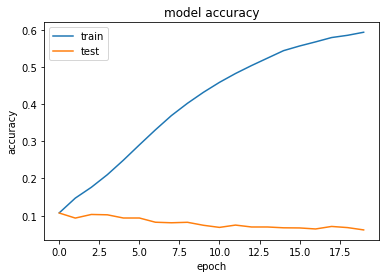

In [20]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

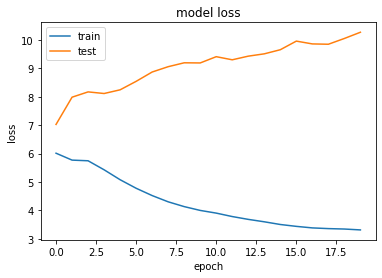

In [21]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

#### Testing

In [33]:
import re

def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_words_index[word]] = 1
    return x
prepare_input("It is not a lack of love but ".lower())

it
is
not
a
lack
of


IndexError: index 5 is out of bounds for axis 1 with size 5

In [26]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [27]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    print("preds:")
    print (preds)
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [28]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [30]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of love, but a lack of 
it
is
not
a
lack
of


IndexError: index 5 is out of bounds for axis 1 with size 5

In [32]:
te = "It is not a lack of love, but"
print(te.split())

['It', 'is', 'not', 'a', 'lack', 'of', 'love,', 'but']
